In [ ]:
#from neighbour_group we find class of listings using price,which listings belongs to which class?for example price<500 is medium
#No_of_listings_bought and corresponding reviews
#No_of_listings_sold and corresponding reviews
#NO_OF_listings_of_each_host
#host_with_more_diverse_listings
#According to neighbourhood which room_type is popular
#Adjusted price column in calendar
#Group by listing_id and count availability in calendar table::find the listings which are least/maximum booked
#which listing is booked most and in which month and if possible which location/neighbour
#which listing is getting most booked and which neighbourhood
#whihc month is the busiest and which listing is the most booked ....
#task of deriving customer details from reviewer_id in reviews table
#which reviewer books max stay and for what duration:longest?
#findind good and bad reviews from comments column in reviews table using.str.contains(),we have to remove null values

In [112]:
# pip install -qq pandasql

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

#### Airbnb Dataset- San Fransisco

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
calendar= pd.read_csv('calendar.csv')
neighbourhoods= pd.read_csv('neighbourhoods.csv')
reviews= pd.read_csv('reviews.csv')
listing= pd.read_csv('listings-4.csv')

#### Calendar:

In [6]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,958,2023-03-06,t,$180.00,$180.00,2,1125
1,958,2023-03-07,t,$180.00,$180.00,2,1125
2,958,2023-03-08,f,$206.00,$206.00,2,1125
3,958,2023-03-09,f,$183.00,$183.00,2,1125
4,958,2023-03-10,t,$180.00,$180.00,2,1125
...,...,...,...,...,...,...,...
2530905,839330745722153339,2024-02-29,f,$150.00,$150.00,3,365
2530906,839330745722153339,2024-03-01,f,$150.00,$150.00,3,365
2530907,839330745722153339,2024-03-02,f,$150.00,$150.00,3,365
2530908,839330745722153339,2024-03-03,f,$150.00,$150.00,3,365


In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530910 entries, 0 to 2530909
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   price           object
 4   adjusted_price  object
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(3), object(4)
memory usage: 135.2+ MB


In [8]:
calendar.available.value_counts()

f    1351666
t    1179244
Name: available, dtype: int64

In [9]:
calendar.loc[calendar.price!=calendar.adjusted_price]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
8395,40092,2023-03-06,f,$117.00,$109.00,30,1125
31128,175090,2023-06-17,f,$117.00,$136.00,30,1125
31129,175090,2023-06-18,f,$117.00,$136.00,30,1125
31130,175090,2023-06-19,f,$117.00,$136.00,30,1125
31131,175090,2023-06-20,f,$117.00,$136.00,30,1125
...,...,...,...,...,...,...,...
2487470,817067809700979706,2024-02-29,t,$109.00,$98.00,1,365
2487471,817067809700979706,2024-03-01,t,$121.00,$109.00,1,365
2487472,817067809700979706,2024-03-02,t,$123.00,$111.00,1,365
2487473,817067809700979706,2024-03-03,t,$113.00,$102.00,1,365


#### Neighbourhoods:

In [10]:
neighbourhoods

,neighbourhood_group,neighbourhood
0,NaN,Bayview
1,NaN,Bernal Heights
2,NaN,Castro/Upper Market
3,NaN,Chinatown
4,NaN,Crocker Amazon
5,NaN,Diamond Heights
6,NaN,Downtown/Civic Center
7,NaN,Excelsior
8,NaN,Financial District
9,NaN,Glen Park


In [11]:
neighbourhoods.neighbourhood.nunique()

37

In [12]:
neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        37 non-null     object 
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


#### using price from listings to classify neighbourhoods into 'low','medium','high','very high' class

In [13]:
neighbourhood_classification= listing[['id','neighbourhood','price']]

In [14]:
neighbourhood_classification.id = neighbourhood_classification.id.astype(str)

C:\Users\SIDY BOY!\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
neighbourhood_classification

,id,neighbourhood,price
0,958,Western Addition,202
1,5858,Bernal Heights,235
2,8142,Haight Ashbury,56
3,8339,Western Addition,575
4,8739,Mission,110
...,...,...,...
6931,833400394714397974,Mission,179
6932,833522577729713929,Castro/Upper Market,143
6933,833620265884756491,Parkside,253
6934,834204382399601571,Western Addition,150


In [16]:
neighbourhood_classification= neighbourhood_classification.groupby('neighbourhood').agg({'price': ['sum','size', 'min', 'max','mean']})

In [17]:
neighbourhood_classification.sort_values(('price', 'mean'), ascending= False)

price                             
                          sum size min    max         mean
neighbourhood                                             
Financial District     157983  147   0  25000  1074.714286
Nob Hill               244918  343   0  20000   714.046647
Downtown/Civic Center  535838  858  26  10000   624.519814
Pacific Heights         70070  165  39   7995   424.666667
Chinatown               40054   98  59   9999   408.714286
Russian Hill            64441  161  40   3571   400.254658
North Beach             61381  157  38  10000   390.961783
Inner Richmond          67433  185  42  25000   364.502703
Diamond Heights          4332   13  70   1045   333.230769
Presidio                 2505    8  94    760   313.125000
Marina                  61465  208  32   2982   295.504808
Castro/Upper Market     82696  286  49   2195   289.146853
Presidio Heights         8483   30  75    900   282.766667
South of Market        143433  525  27  10000   273.205714
Bernal Heights          79397  291  32  14000   272.841924
Inner Sunset            40988  155  30   3800   264.438710
Twin Peaks              12741   51  62   1100   249.823529
Noe Valley              57729  234  47   2700   246.705128
Glen Park               13828   58  73    799   238.413793
Western Addition       111581  475  30   4187   234.907368
Seacliff                 1637    7  70    535   233.857143
Potrero Hill            35543  152  50   1600   233.835526
West of Twin Peaks      22036   97  31   5150   227.175258
Haight Ashbury          57017  290  31   1169   196.610345
Outer Richmond          36092  189  32    790   190.962963
Mission                116046  621  35   1086   186.869565
Outer Mission           19845  115  32   2000   172.565217
Outer Sunset            49224  304  37   2107   161.921053
Parkside                21221  139   0    695   152.669065
Visitacion Valley        8820   64  50    550   137.812500
Lakeshore                7546   59  38    600   127.898305
Bayview                 20357  166  36    411   122.632530
Ocean View              11129   94  27    625   118.393617
Crocker Amazon           4853   41  40    500   118.365854
Excelsior               16860  150  34    664   112.400000

In [18]:
neighbourhood_classification.loc[neighbourhood_classification[('price', 'mean')] < 200,'price_bracket']= 'low'
neighbourhood_classification.loc[(neighbourhood_classification[('price', 'mean')]>=200) & (neighbourhood_classification[('price', 'mean')]<400),'price_bracket']= 'medium'
neighbourhood_classification.loc[(neighbourhood_classification[('price', 'mean')]>=400) & (neighbourhood_classification[('price', 'mean')]<700),'price_bracket']='high'
neighbourhood_classification.loc[neighbourhood_classification[('price', 'mean')]>=700,'price_bracket']='very high'

In [19]:
neighbourhood_classification.columns = ['_'.join(col) for col in neighbourhood_classification.columns.values]

In [20]:
neighbourhood_classification.rename(columns={'price_mean': 'avg_price_by_neighbourhood','price_size':'total_listings_per_neighbourhood','price_sum':'total_sum_of_price_by_neighbourhood', 'price_min':'cheapest_listing_by_neighbour','price_max':'most_expensive_listing_by_neighbourhood', 'price_bracket_':'price_bracket_of_neighbourhood'}, inplace=True)

In [21]:
neighbourhood_classification.reset_index(inplace=True)

#### Reviews:

In [22]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...
...,...,...,...,...,...,...
332535,806669295185663778,825457832546194561,2023-02-12,182856873,Daniel,everything good
332536,806669295185663778,825536403192043708,2023-02-12,122503306,Megan,Good place to stay to get the feel for San Fra...
332537,806669295185663778,829118888882627245,2023-02-17,285205676,Julia,"Dirty spots on sheets, dusty, very noisy, bad ..."
332538,806669295185663778,830519926292022175,2023-02-19,275711729,José Maria,El precio es acorde a lo reservado. Amable anf...


In [23]:
#reviews.loc[reviews.comments.str.contains('good')]

In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332540 entries, 0 to 332539
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     332540 non-null  int64 
 1   id             332540 non-null  int64 
 2   date           332540 non-null  object
 3   reviewer_id    332540 non-null  int64 
 4   reviewer_name  332540 non-null  object
 5   comments       332491 non-null  object
dtypes: int64(3), object(3)
memory usage: 15.2+ MB


In [25]:
#listing_id= 5611
#reviewer_id= 299746
#id= 332540

In [26]:
reviews.comments.tail()

332535                                      everything good
332536    Good place to stay to get the feel for San Fra...
332537    Dirty spots on sheets, dusty, very noisy, bad ...
332538    El precio es acorde a lo reservado. Amable anf...
332539    Host is really good with communication. <br/>L...
Name: comments, dtype: object

#### listing:

In [27]:
listing.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,City Registration Pending
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,NaN
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,NaN
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,STR-0000264
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,STR-0000028


In [28]:
listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [29]:
listing_df = listing.drop(columns=['neighbourhood_group','latitude', 'longitude','minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count','availability_365','number_of_reviews_ltm', 'license'])

In [30]:
listing_df

,id,name,host_id,host_name,neighbourhood,room_type,price
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,Entire home/apt,202
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,Entire home/apt,235
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,Private room,56
3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,Entire home/apt,575
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,Private room,110
...,...,...,...,...,...,...,...
6931,833400394714397974,New Condo w Rooftop Deck & A/C,1257432,San Francisco Life Real Estate,Mission,Entire home/apt,179
6932,833522577729713929,Mission/Castro near Dolores Park,215787219,Janet,Castro/Upper Market,Entire home/apt,143
6933,833620265884756491,Your home is waiting !,42213595,Emmanuel,Parkside,Entire home/apt,253
6934,834204382399601571,Broadmoor Large Studio 245,502034331,David,Western Addition,Private room,150


In [31]:
listing.neighbourhood.nunique()

35

In [32]:
listing.room_type.value_counts()

Entire home/apt    4458
Private room       2359
Shared room          67
Hotel room           52
Name: room_type, dtype: int64

In [33]:
#listing.loc[listing.name.str.contains('Bath')]

In [34]:
#listing.loc[listing.host_id==7149]

#### replacing 'entire home/apt with 'entire home'

In [35]:
#listing_df.room_type.value_counts()

In [36]:
listing_df.loc[listing_df.room_type=='Entire home/apt','room_type']= 'Entire home'

In [37]:
listing_df

,id,name,host_id,host_name,neighbourhood,room_type,price
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,Entire home,202
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,Entire home,235
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,Private room,56
3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,Entire home,575
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,Private room,110
...,...,...,...,...,...,...,...
6931,833400394714397974,New Condo w Rooftop Deck & A/C,1257432,San Francisco Life Real Estate,Mission,Entire home,179
6932,833522577729713929,Mission/Castro near Dolores Park,215787219,Janet,Castro/Upper Market,Entire home,143
6933,833620265884756491,Your home is waiting !,42213595,Emmanuel,Parkside,Entire home,253
6934,834204382399601571,Broadmoor Large Studio 245,502034331,David,Western Addition,Private room,150


#### checking duplicates:

In [38]:
listing_df.duplicated().value_counts()

False    6936
dtype: int64

### no of total listings of every host

In [39]:
listing_df.groupby('host_id').count().sort_values('id',ascending=False)

,id,name,host_name,neighbourhood,room_type,price
host_id,,,,,,
4430421,154,154,154,154,154,154
107434423,138,138,138,138,138,138
173206762,61,61,61,61,61,61
267895362,55,55,55,55,55,55
17042045,46,46,46,46,46,46
...,...,...,...,...,...,...
10618159,1,1,1,1,1,1
10624702,1,1,1,1,1,1
10626427,1,1,1,1,1,1


### no of total listings of every host per neighbourhood

In [40]:
listing_df.groupby(['host_id','neighbourhood']).count().sort_values('id', ascending=False)

,,id,name,host_name,room_type,price
host_id,neighbourhood,,,,,
4430421,Downtown/Civic Center,92,92,92,92,92
107434423,South of Market,79,79,79,79,79
4430421,Mission,62,62,62,62,62
173206762,Downtown/Civic Center,61,61,61,61,61
17042045,Downtown/Civic Center,46,46,46,46,46
...,...,...,...,...,...,...
10489933,North Beach,1,1,1,1,1
10508562,Marina,1,1,1,1,1
10508610,Outer Mission,1,1,1,1,1


### total number of neighbourhoods, where the host owns listings
#### or
### host_with_more_diverse_listings

In [41]:
df_test= listing_df.groupby(['host_id','neighbourhood']).count().sort_values('id', ascending=False)

In [42]:
df_test.reset_index(inplace=True)

In [43]:
df_test.groupby(['host_id']).count().sort_values('id',ascending= False)

,neighbourhood,id,name,host_name,room_type,price
host_id,,,,,,
303118342,10,10,10,10,10,10
38836,9,9,9,9,9,9
91333416,9,9,9,9,9,9
1257432,9,9,9,9,9,9
1892430,9,9,9,9,9,9
...,...,...,...,...,...,...
8634657,1,1,1,1,1,1
8638224,1,1,1,1,1,1
8640573,1,1,1,1,1,1


In [45]:
#from neighbour_group we find class of listings using price,which listings belongs to which class?for example price<500 is medium
neighbourhood_classification

,neighbourhood,total_sum_of_price_by_neighbourhood,total_listings_per_neighbourhood,cheapest_listing_by_neighbour,most_expensive_listing_by_neighbourhood,avg_price_by_neighbourhood,price_bracket_of_neighbourhood
0,Bayview,20357,166,36,411,122.632530,low
1,Bernal Heights,79397,291,32,14000,272.841924,medium
2,Castro/Upper Market,82696,286,49,2195,289.146853,medium
3,Chinatown,40054,98,59,9999,408.714286,high
4,Crocker Amazon,4853,41,40,500,118.365854,low
5,Diamond Heights,4332,13,70,1045,333.230769,medium
6,Downtown/Civic Center,535838,858,26,10000,624.519814,high
7,Excelsior,16860,150,34,664,112.400000,low
8,Financial District,157983,147,0,25000,1074.714286,very high
9,Glen Park,13828,58,73,799,238.413793,medium


Text(0.5, 1.0, 'Price brackets of AirBnB listings across all neighbourhoods')

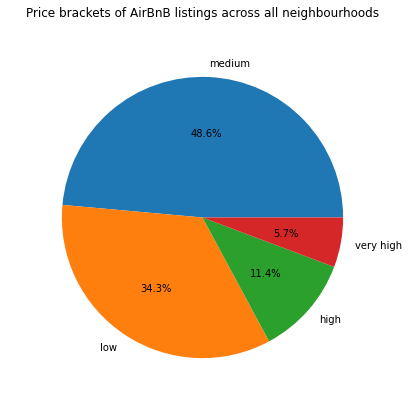

In [83]:
plt.figure(figsize=(7,10))
plt.pie(neighbourhood_classification.price_bracket_of_neighbourhood.value_counts(), radius= 0.9,labels=[ 'medium','low','high', 'very high'], autopct='%1.1f%%')
plt.title('Price brackets of AirBnB listings across all neighbourhoods')

(array([12.,  0., 17.,  0.,  4.,  0.,  2.]),
 array([0.        , 0.42857143, 0.85714286, 1.28571429, 1.71428571,
        2.14285714, 2.57142857, 3.        ]),
 <BarContainer object of 7 artists>)

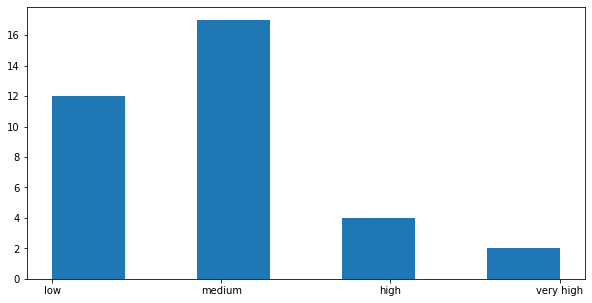

In [94]:
plt.figure(figsize=(10,5))
plt.hist(neighbourhood_classification.price_bracket_of_neighbourhood, bins=7)

### Top 5  most reviewed listings

In [95]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...
...,...,...,...,...,...,...
332535,806669295185663778,825457832546194561,2023-02-12,182856873,Daniel,everything good
332536,806669295185663778,825536403192043708,2023-02-12,122503306,Megan,Good place to stay to get the feel for San Fra...
332537,806669295185663778,829118888882627245,2023-02-17,285205676,Julia,"Dirty spots on sheets, dusty, very noisy, bad ..."
332538,806669295185663778,830519926292022175,2023-02-19,275711729,José Maria,El precio es acorde a lo reservado. Amable anf...


In [102]:
reviews.groupby('listing_id').count().sort_values('id', ascending=False).iloc[:,0:1].head(5)

,id
listing_id,
545685,1002
585326,914
35642179,900
8356380,788
8739,770


### Top 5 reviewers with their total review counts:

In [104]:
reviews.reviewer_name.value_counts().head(5)

Michael    2987
David      2931
John       2167
Sarah      2031
Daniel     1892
Name: reviewer_name, dtype: int64

### caledder questions:

In [1]:
#Adjusted price column in calendar
#Group by listing_id and count availability in calendar table::find the listings which are least/maximum booked
#which listing is booked most and in which month and if possible which location/neighbour
#which listing is getting most booked and which neighbourhood

#whihc month is the busiest and which listing is the most booked ....

### task of deriving customer details from reviewer_id in reviews table

In [112]:
listing_df

,id,name,host_id,host_name,neighbourhood,room_type,price
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,Entire home,202
1,5858,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,Entire home,235
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,Private room,56
3,8339,Historic Alamo Square Victorian,24215,Rosy,Western Addition,Entire home,575
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,Private room,110
...,...,...,...,...,...,...,...
6931,833400394714397974,New Condo w Rooftop Deck & A/C,1257432,San Francisco Life Real Estate,Mission,Entire home,179
6932,833522577729713929,Mission/Castro near Dolores Park,215787219,Janet,Castro/Upper Market,Entire home,143
6933,833620265884756491,Your home is waiting !,42213595,Emmanuel,Parkside,Entire home,253
6934,834204382399601571,Broadmoor Large Studio 245,502034331,David,Western Addition,Private room,150


In [111]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,V Jillian,Holly's place was great. It was exactly what I...
...,...,...,...,...,...,...
332535,806669295185663778,825457832546194561,2023-02-12,182856873,Daniel,everything good
332536,806669295185663778,825536403192043708,2023-02-12,122503306,Megan,Good place to stay to get the feel for San Fra...
332537,806669295185663778,829118888882627245,2023-02-17,285205676,Julia,"Dirty spots on sheets, dusty, very noisy, bad ..."
332538,806669295185663778,830519926292022175,2023-02-19,275711729,José Maria,El precio es acorde a lo reservado. Amable anf...


In [114]:
listing_df.merge(reviews, on=['id','listing_id'], left_index=[ : , : ], right_on=['listing_id','date','reviewer_name','reviewer_id'] )

MergeError: Can only pass argument "on" OR "left_on" and "right_on", not a combination of both.

In [108]:
#which reviewer books max stay and for what duration:longest?


In [ ]:
#findind good and bad reviews from comments column in reviews table using.str.contains(),we have to remove null values
